In [9]:
"""Etapa 1: Busca e Compreensão de Dados"""

import pandas as pd

# Caminho para o arquivo
file_path = '../data/raw/bank-full.csv'

# Carregar o dataset
data = pd.read_csv(file_path, delimiter=';')

# Mostrar informações básicas
print("Tamanho do dataset:", data.shape)
print("\nPrimeiras 5 linhas:")
display(data.head())


Tamanho do dataset: (45211, 17)

Primeiras 5 linhas:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
"""Exploração Geral dos Dados"""

# Dimensões do DataFrame
print(f"Número de linhas e colunas: {data.shape}")

# Tipos de dados em cada coluna
print("\nTipos de dados:")
print(data.dtypes)

# Visualizar primeiras e últimas linhas
print("\nPrimeiras linhas:")
print(data.head())
print("\nÚltimas linhas:")
print(data.tail())


Número de linhas e colunas: (45211, 17)

Tipos de dados:
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Primeiras linhas:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1   

In [13]:
"""Qualidade dos Dados"""

# Checar valores ausentes
print("\nValores ausentes por coluna:")
print(data.isnull().sum())

# Verificar valores duplicados
print("\nNúmero de registros duplicados:")
print(data.duplicated().sum())



Valores ausentes por coluna:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Número de registros duplicados:
0


In [15]:
"""Estatísticas e Resumo Inicial"""

print("\nResumo estatístico:")
print(data.describe())

"""
Isso retornará métricas como:

Média (mean)
Desvio padrão (std)
Mínimo (min)
Máximo (max)
Quartis (25%, 50%, 75%)
"""



Resumo estatístico:
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%   

'\nIsso retornará métricas como:\n\nMédia (mean)\nDesvio padrão (std)\nMínimo (min)\nMáximo (max)\nQuartis (25%, 50%, 75%)\n'

In [16]:
"""Exploração de Variáveis Categóricas"""

# Distribuição das categorias em algumas colunas
print("\nDistribuição de 'job':")
print(data['job'].value_counts())

print("\nDistribuição de 'marital':")
print(data['marital'].value_counts())

print("\nDistribuição de 'education':")
print(data['education'].value_counts())


Distribuição de 'job':
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

Distribuição de 'marital':
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

Distribuição de 'education':
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64


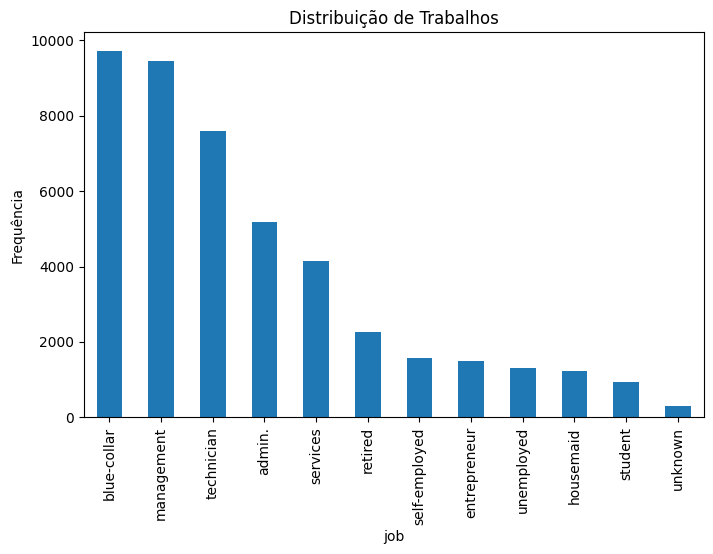

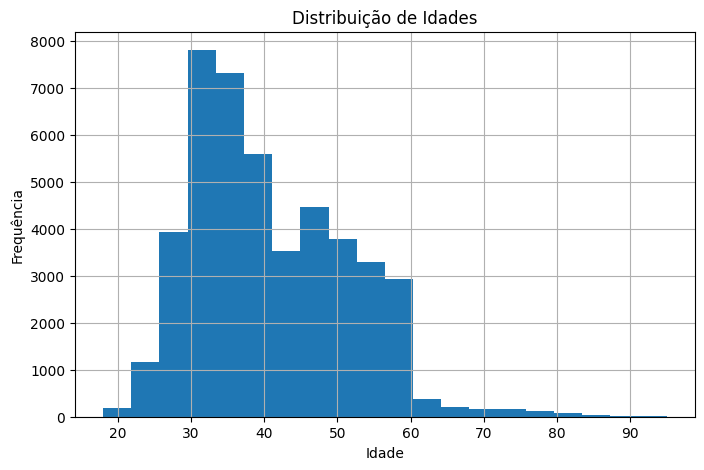

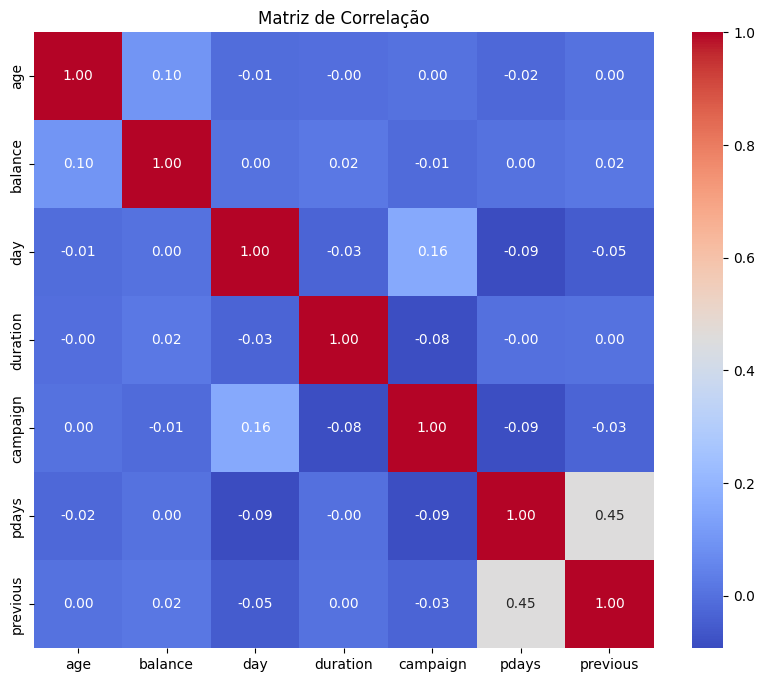

In [18]:
"""Visualização Inicial dos Dados"""
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras para 'job'
data['job'].value_counts().plot(kind='bar', figsize=(8, 5))
plt.title("Distribuição de Trabalhos")
plt.ylabel("Frequência")
plt.show()

# Histograma para 'age'
data['age'].hist(bins=20, figsize=(8, 5))
plt.title("Distribuição de Idades")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.show()

# Selecionar apenas colunas numéricas
numerical_columns = data.select_dtypes(include=['int64', 'float64'])

# Matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlação")
plt.show()
